<a href="https://colab.research.google.com/github/krisbarbier/Prediction-of-Product-Sales-/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

Kris Barbier

## Project Overview

- In this project, we will be looking at different item and outlet characteristics that impact sales in order to answer the question: What kinds of items and outlets generate the most sales?

## Load and Inspect Data

In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Load in data from Google Drive path
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

df = pd.read_csv(fpath)

In [5]:
#Preview the first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#Get data set summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

How many rows and columns are there?

In [7]:
#Find number of rows and columns
df.shape

(8523, 12)

- There are 8,523 rows and 12 columns in this data set.

What are the data types present in this set?

In [8]:
#Inspect data types for each column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- Within this data set, there are 7 object-type, 4 float-type, and 1 interger-type columns.

###Duplicate Data

Are there any duplicates in the data?

In [9]:
#Check for duplicated rows
duplicated_rows = df.duplicated(keep = False)
duplicated_rows.sum()

0

- There are no duplicates in the data, and therefore no need to drop them in the cleaning process.

###Missing Data

Identify missing values:

In [10]:
#Identify missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#Percentage of missing values per column
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- In this data set, there are 1,463 missing values in the Item_Weight column, and 2,410 missing values in the Outlet_Size column.
- In order to deal with them effectively, we will examine the data types of the columns first.

Inspecting column data types:

In [12]:
#Inspect data types for each column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- The Item_Weight column contains float-type data, and the Outlet_Size column contains object-type data.

Handling null float-type values:

- In order to fill the null values of this numeric type column, I will first get the summary statistics for the column, and then decide whether to use a general placeholder, or use a measure of central tendency such as the mean or median.

In [13]:
#Get the summary statistics for Item_Weight
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

- Based on the summary statistics, I do not feel that using a general placeholder (such as 1) would be as appropriate as using a measure of central tendency.
- I will be using the mean of 12.86 to fill null values in the Item_Weight column.

In [14]:
#Fill null values with the mean
df['Item_Weight'] = df['Item_Weight'].fillna(12.86)
#Verify the values were filled
df['Item_Weight'].isna().sum()

0

Handling null object-type values:

- In order to fill these values, I will use the placeholder "MISSING".

In [15]:
#Fill null values in Outlet_Size column
df['Outlet_Size'] = df['Outlet_Size'].fillna("MISSING")
#Verify the values were filled
df['Outlet_Size'].isna().sum()

0

In [16]:
#Confirm no missing values in entire data set
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- All missing values have been filled and accounted for.

###Consistency

Check for consistency in values

In [17]:
#Save a list of categorical variables
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [18]:
#Obtain value counts for all categorical columns
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  #Print empty line for readability
  print("\n")

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


- Based on the values seen above, there are inconsistencies in the Item_Fat_Content and Outlet_Size columns that need to be addressed.
- "LF" and "low fat" need to be changed to "Low Fat"
- "reg" needs to be changed to "Regular"
- "High" should be changed to "Large"

In [19]:
#Standardize the Item_Fat_Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
#Verify the change
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
#Standardize the Outlet_Size column
df['Outlet_Size'] = df['Outlet_Size'].replace({'High': 'Large'})
#Verify the change
df['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

###Summary Statistics

Summary Statistics for Numeric Columns

In [21]:
#Explore summary statistics
summary_stats = df.describe().round(2)
summary_stats.loc[['mean', 'min', 'max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.86,0.07,140.99,1997.83,2181.29
min,4.56,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96


## Exploratory Data Analysis

###EDA for Numeric Columns

Here, I will explore the data from the numeric columns of the data set, looking specifically at Item Weight, Item MRP, and Item Outlet Sales.

I chose not to visualize Outlet Establishment Year and Item Visibility.

####Item Weight Visualizations

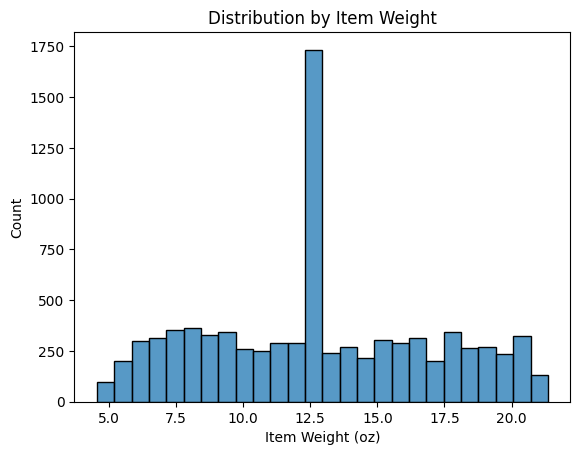

In [22]:
#Create a histogram for Item_Weight
ax = sns.histplot(data = df, x = 'Item_Weight');
ax.set_title('Distribution by Item Weight');
ax.set_xlabel('Item Weight (oz)');

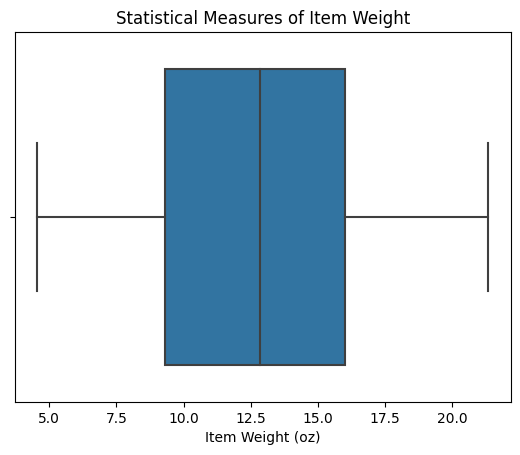

In [23]:
#Create boxplot of Item_Weight
ax = sns.boxplot(data = df, x = 'Item_Weight');
ax.set_title('Statistical Measures of Item Weight');
ax.set_xlabel('Item Weight (oz)');

- In this histogram, we see a fairly normal distribution, with a large count of items in the middle bin of 12.5.

- The boxplot of Item Weight also shows a fairly normal distribution, with no outliers from the Item Weight column. Here we see that the median weight is slightly higher than 12.5.

####Item Maximum Retail Price Visualizations

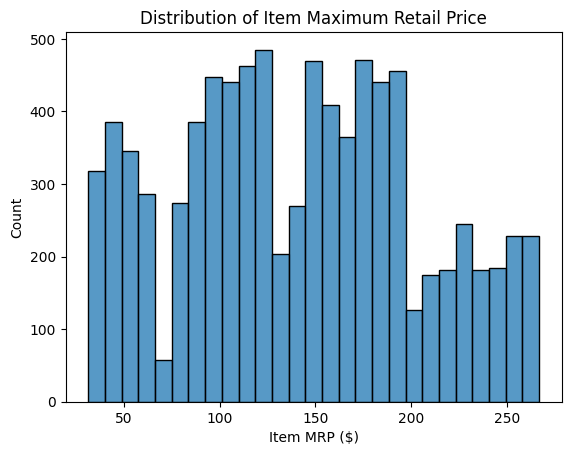

In [24]:
#Create a histogram of Item_MRP
ax = sns.histplot(data = df, x = 'Item_MRP')
ax.set_title('Distribution of Item Maximum Retail Price');
ax.set_xlabel('Item MRP ($)');

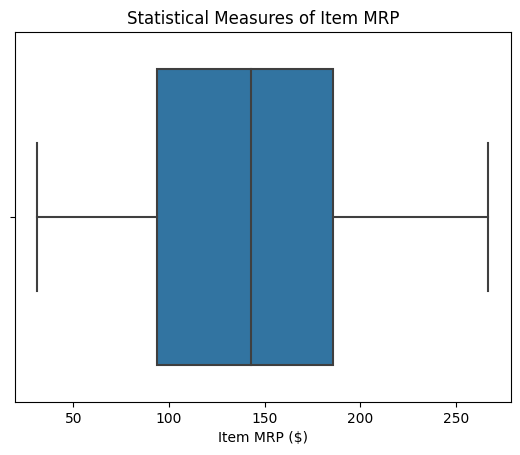

In [25]:
#Create a boxplot of Item_MRP
ax = sns.boxplot(data = df, x = 'Item_MRP')
ax.set_title("Statistical Measures of Item MRP");
ax.set_xlabel('Item MRP ($)');

- From these two visualizations of Item MRP, we see that again there are no outliers. The median maximum price is just under $150.

####Item Outlet Sales Visualizations

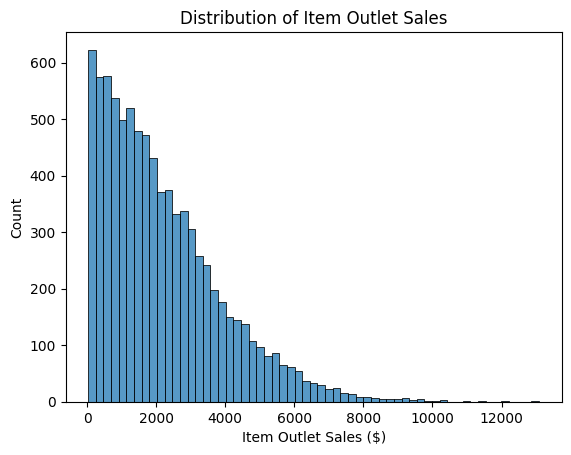

In [26]:
#Create a histogram for Item_Outlet_Sales
ax = sns.histplot(data = df, x = 'Item_Outlet_Sales');
ax.set(xlabel = 'Item Outlet Sales ($)', title = "Distribution of Item Outlet Sales");

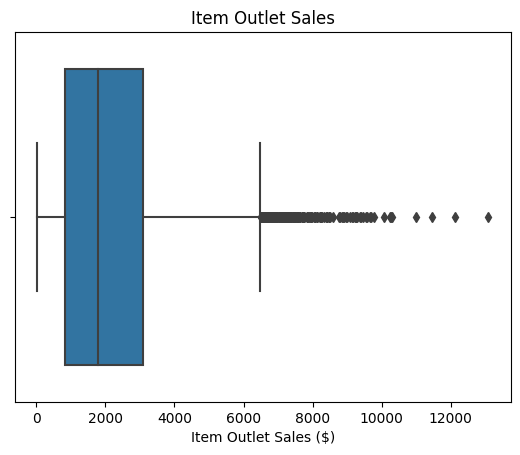

In [27]:
#Boxplot of Item_Outlet_Sales
ax = sns.boxplot(data = df, x = 'Item_Outlet_Sales')
ax.set(xlabel = 'Item Outlet Sales ($)', title = 'Item Outlet Sales');

- From these two visualizations of Item Outlet Sales, we see that the distribution is skewed, with a tail to the right. These outliers could be unreasonable values that got missed in the cleaning process, or they could be legitimate sales numbers.

###EDA for Categorical Columns

Next, I will explore data from categorical columns using countplots.

In [28]:
#Get values counts
fat_content_counts = df['Item_Fat_Content'].value_counts()
fat_content_counts.index

Index(['Low Fat', 'Regular'], dtype='object')

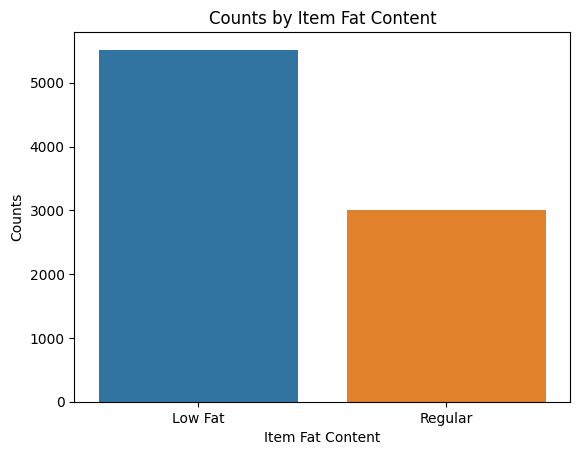

In [29]:
#Create countplot for Item_Fat_Content
ax = sns.countplot(data = df, x = 'Item_Fat_Content', order = fat_content_counts.index)
ax.set(xlabel = 'Item Fat Content', ylabel = 'Counts', title = 'Counts by Item Fat Content');

- In this plot, we see that there are a higher number of low fat items sold than regular fat items.

In [30]:
#Get value counts
item_counts = df['Item_Type'].value_counts()
item_counts.index

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
       'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
       'Seafood'],
      dtype='object')

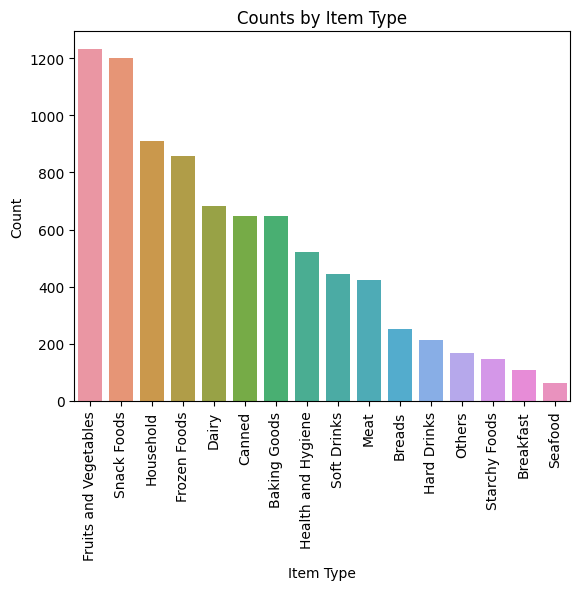

In [31]:
#Create countplot for Item_Type
ax = sns.countplot(data = df, x = 'Item_Type', order = item_counts.index);
ax.set(xlabel = 'Item Type', ylabel = 'Count', title = 'Counts by Item Type');
ax.tick_params(axis = 'x', rotation = 90);

- From this countplot, we can see that the 4 top selling item types are Fruits and Vegetables, Snack Foods, Household, and Frozen Foods. Alternately, the 4 lowest selling item types are Seafood, Breakfast, Starchy Foods, and Others. This may help us to predict overall sales based on item type.

In [32]:
#Get value counts
outlet_ID = df['Outlet_Identifier'].value_counts()
outlet_ID.index

Index(['OUT027', 'OUT013', 'OUT049', 'OUT046', 'OUT035', 'OUT045', 'OUT018',
       'OUT017', 'OUT010', 'OUT019'],
      dtype='object')

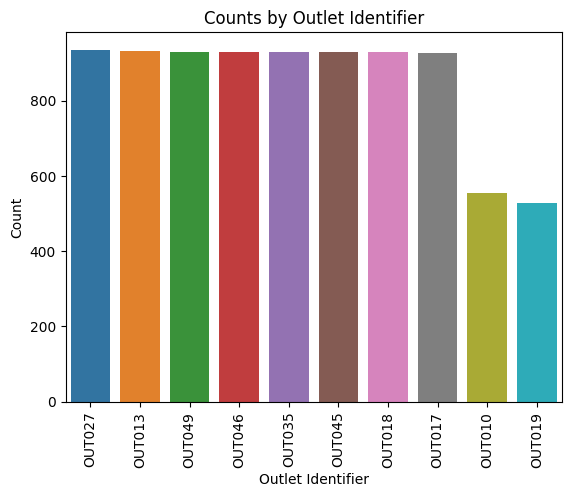

In [33]:
#Create countplot for Outlet_Identifier
ax = sns.countplot(data = df, x = 'Outlet_Identifier', order = outlet_ID.index);
ax.set(xlabel = 'Outlet Identifier', ylabel = 'Count', title = 'Counts by Outlet Identifier');
ax.tick_params(axis = 'x', rotation = 90);

- In this countplot we see that most outlet identifier numbers occur equally in the data set, with only two outlets that do not occur as frequently.

In [34]:
#Get value counts for outlet size
size_counts = df['Outlet_Size'].value_counts()
size_counts.index

Index(['Medium', 'MISSING', 'Small', 'Large'], dtype='object')

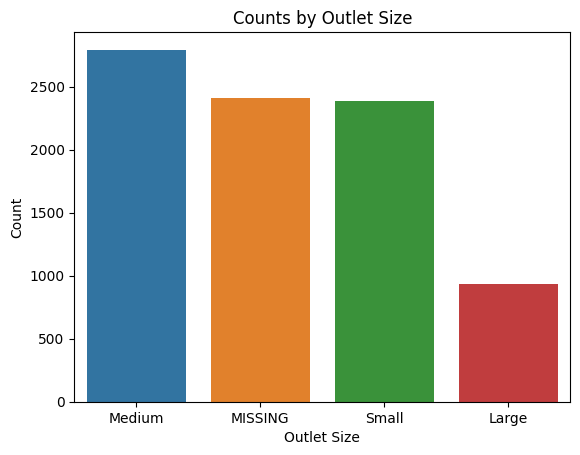

In [35]:
#Create countplot for Outlet_Size
ax = sns.countplot(data = df, x = 'Outlet_Size', order = size_counts.index);
ax.set(xlabel = 'Outlet Size', ylabel = 'Count', title = 'Counts by Outlet Size');

- From this plot we see that the most common outlet size is Medium.

In [36]:
#Get value counts for location type
loc_type_counts = df['Outlet_Location_Type'].value_counts()
loc_type_counts.index

Index(['Tier 3', 'Tier 2', 'Tier 1'], dtype='object')

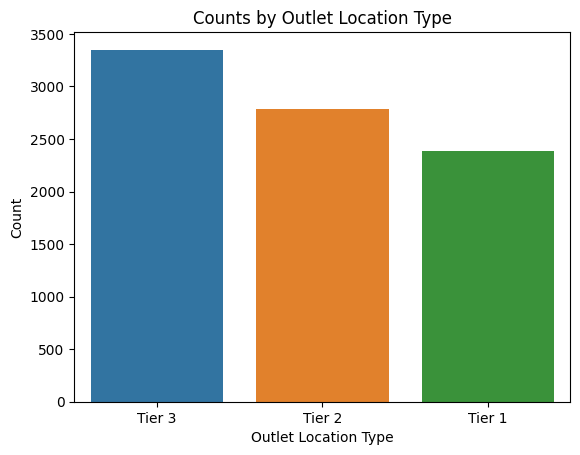

In [37]:
#Create countplot for Outlet_Location_Type
ax = sns.countplot(data = df, x = 'Outlet_Location_Type', order = loc_type_counts.index)
ax.set(xlabel = 'Outlet Location Type', ylabel = 'Count', title = 'Counts by Outlet Location Type');

- Here, we see that Tier 3 outlet location types are the most common.

In [38]:
#Get value counts for outlet type
type_counts = df['Outlet_Type'].value_counts()
type_counts.index

Index(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'],
      dtype='object')

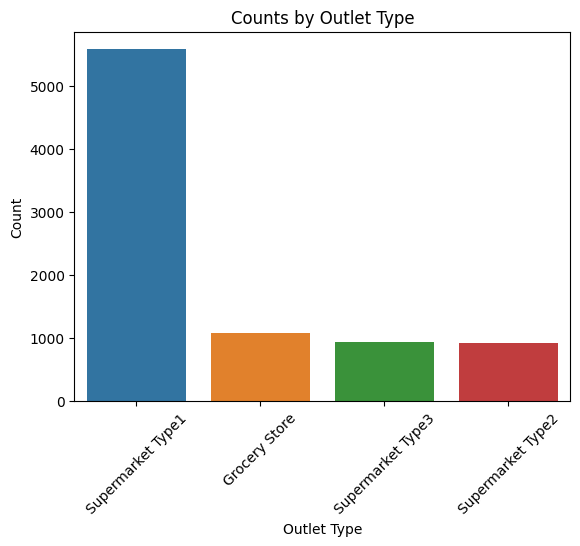

In [39]:
#Create countplot for Outlet_Type
ax = sns.countplot(data = df, x = 'Outlet_Type', order = type_counts.index);
ax.set(xlabel = 'Outlet Type', ylabel = 'Count', title = 'Counts by Outlet Type');
ax.tick_params(axis = 'x', rotation = 45);

- Finally, in this plot we see that Supermarket Type 1 outlets far outnumber the other types of outlets.

###Correlation Analysis

Here, I will examine any correlations in the data set.

####Correlation Heatmap

In [40]:
#Get correlation values
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


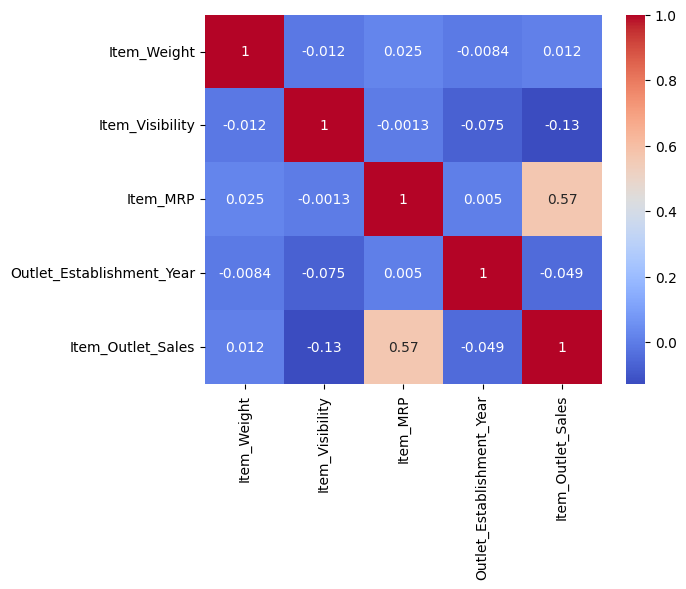

In [41]:
#Create heatmap
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

- From the heatmap we see a moderate correlation of 0.57 between Item Outlet Sales and Item MRP. Beyond this, there are not really any other relationships to note.

## Feature Inspection

###Custom Functions

####Univariate Functions

In [42]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


####Multivariate Functions

In [43]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

###Replace Placeholders

In [44]:
#Replace placeholder values with Nan

#Item_Weight column
df['Item_Weight'] = df['Item_Weight'].replace(12.86, np.nan)

#Outlet_Size column
df['Outlet_Size'] = df['Outlet_Size'].replace('MISSING', np.nan)

In [45]:
#Verify changes were made
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###Feature Inspection

####Item Identifier

- Item_Identifier: Product ID



In [46]:
#Univariate EDA
#Comfirm data type for function call
feature = 'Item_Identifier'
df[feature].dtype

dtype('O')

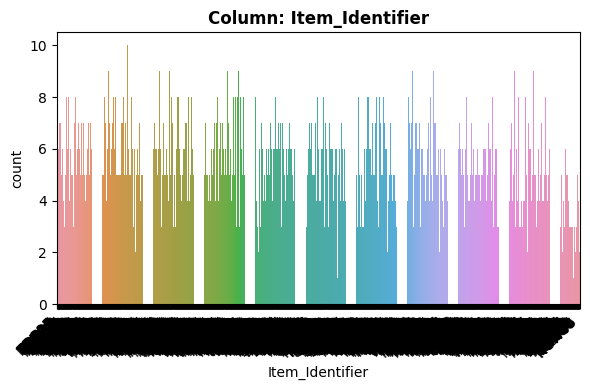

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [47]:
#Call explore categorical function
explore_categorical(df, feature);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical(nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - The cardinality is very high, with 1559 unique values.
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - Having such high cardinality, we may consider excluding this feature for future testing.

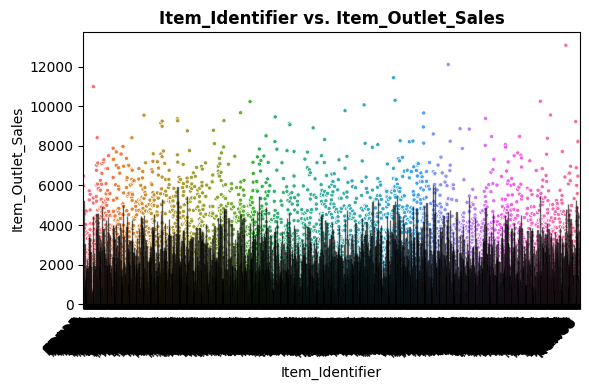

In [48]:
#Multivariate EDA
plot_categorical_vs_target(df, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is not a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature could be a predictor of total sales.

####Item Weight

Item_Weight: Weight of product



In [49]:
#Univariate EDA
#Comfirm data type for function call
feature1 = 'Item_Weight'
df[feature1].dtype

dtype('float64')

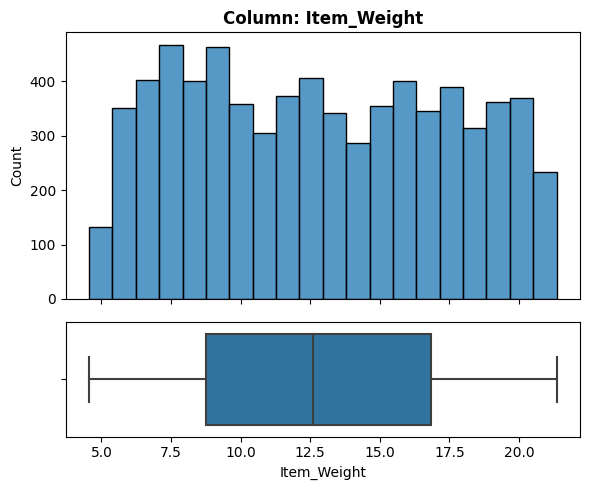

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [50]:
#Call numeric function
explore_numeric(df, feature1);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is numeric.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are 1463 null values, or 17.17% of values. I would impute the mean or median into these values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - N/A (numeric)
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

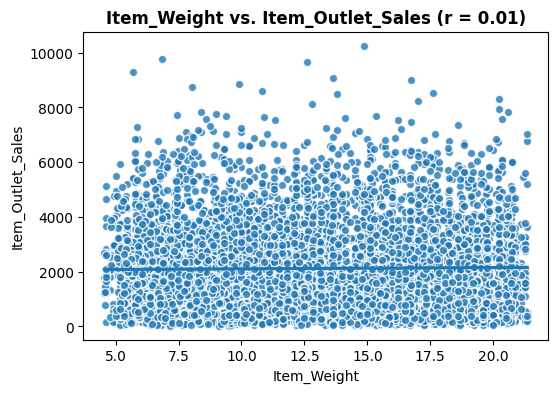

In [51]:
#Multivariate EDA
plot_numeric_vs_target(df, feature1);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - No, I don't really think that item weight predicts sales.
2. Does this feature appear to be a predictor of the target?
  - No, there is no correlation between item weight and sales.

####Item Fat Content

Item_Fat_Content: Whether the product is low-fat or regular



In [52]:
#Univariate EDA
#Comfirm data type for function call
feature2 = 'Item_Fat_Content'
df[feature2].dtype

dtype('O')

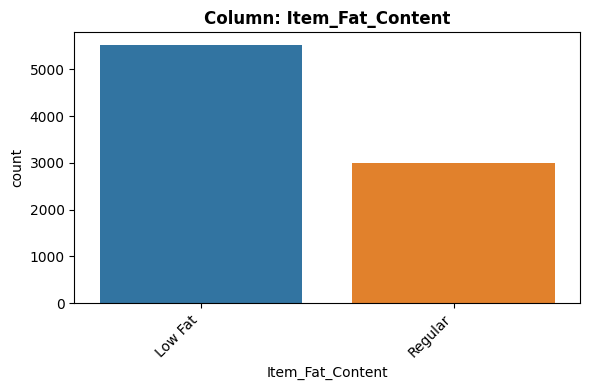

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [53]:
#Call categorical function
explore_categorical(df, feature2);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical(nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - The cardinality is low, with 2 unique values.
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

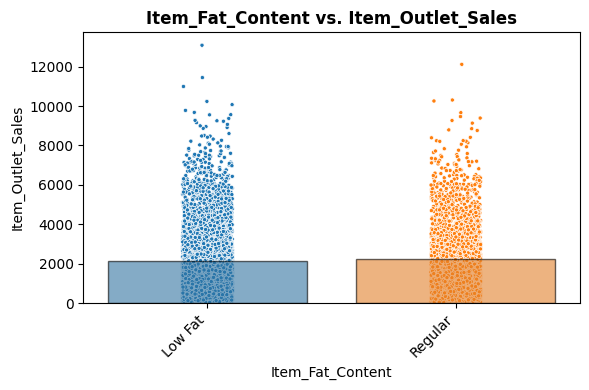

In [54]:
#Multivariate EDA
plot_categorical_vs_target(df, feature2)

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes, I would expect that an item's fat content could impact it's sales.
2. Does this feature appear to be a predictor of the target?
  - There is a pretty wide range of values, but it does not seem to show any significant changes in sales based on fat content.

####Item Visibility

Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product



In [55]:
#Univariate EDA
#Comfirm data type for function call
feature3 = 'Item_Visibility'
df[feature3].dtype

dtype('float64')

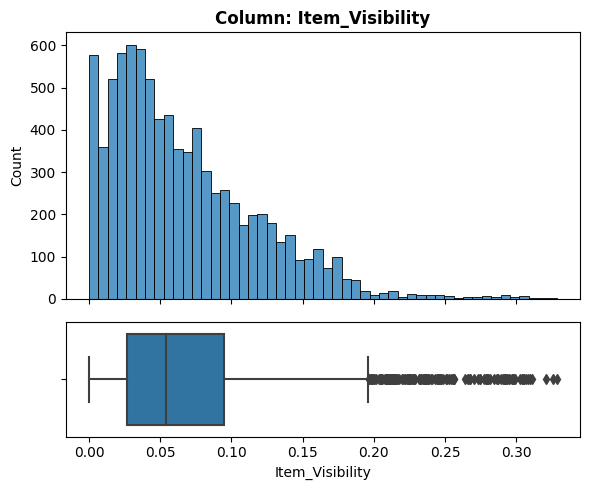

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [56]:
#Call numeric function
explore_numeric(df, feature3);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is numeric.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are 0 null values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - N/A (numeric)
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

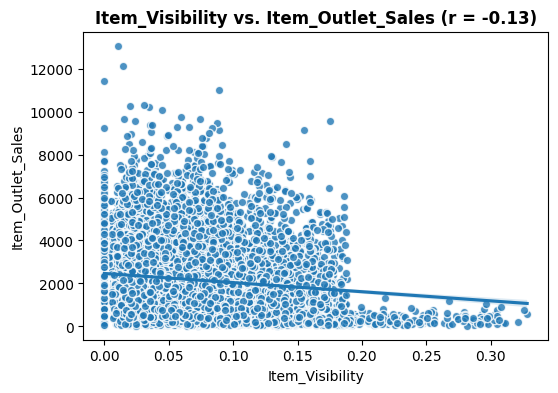

In [57]:
#Multivariate EDA
plot_numeric_vs_target(df, feature3);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes, I would expect that an item's visibility could impact it's sales.
2. Does this feature appear to be a predictor of the target?
  - This shows the opposite of what I expected. Although the negative correlation is small, it still shows that sales decrease as visibility increases.

####Item Type

Item_Type: The category to which the product belongs


In [58]:
#Univariate EDA
#Comfirm data type for function call
feature4 = 'Item_Type'
df[feature4].dtype

dtype('O')

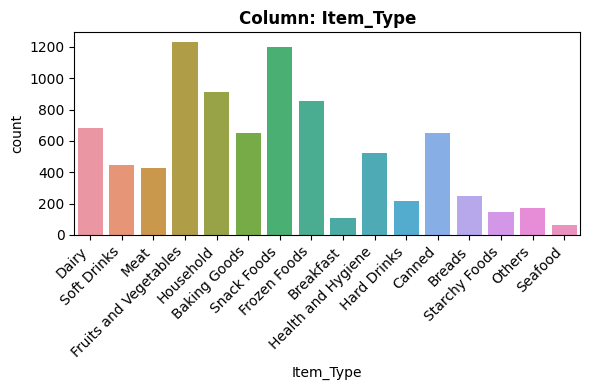

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [59]:
#Call categorical function
explore_categorical(df, feature4);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical(nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - The cardinality is high, with 16 unique values.
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

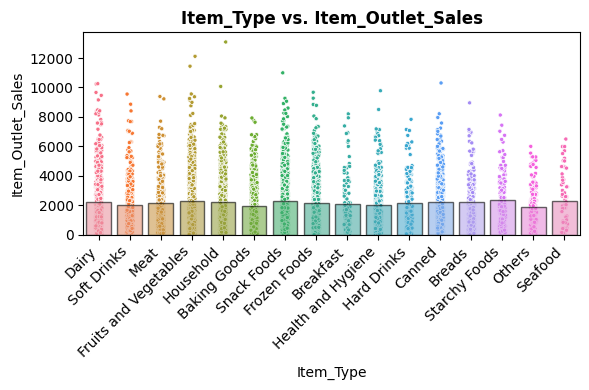

In [60]:
#Multivariate EDA
plot_categorical_vs_target(df, feature4);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes, I would expect that an item's type could impact it's sales.
2. Does this feature appear to be a predictor of the target?
  - Yes, I believe this item is a predictor of sales. There is a much larger spread of sales values per item type, so the type can predict the sales of the item.

####Item MRP

Item_MRP: Maximum Retail Price (list price) of the product

In [61]:
#Univariate EDA
#Comfirm data type for function call
feature5 = 'Item_MRP'
df[feature5].dtype

dtype('float64')

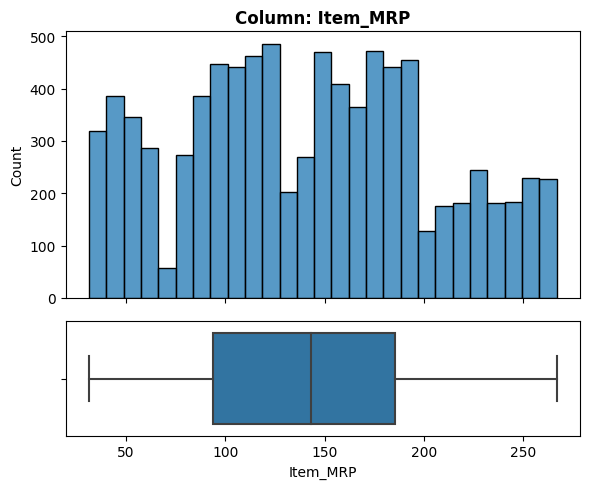

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [62]:
#Call numeric function
explore_numeric(df, feature5);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is numeric.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are 0 null values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - N/A (numeric)
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

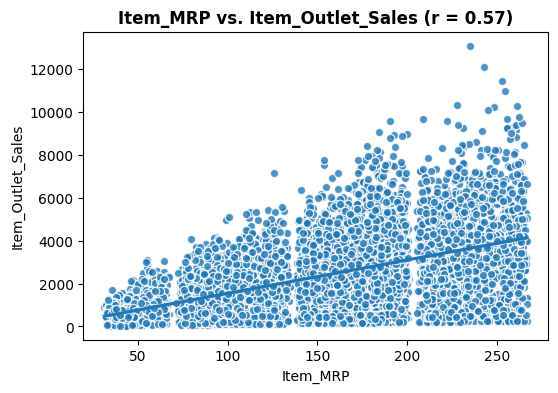

In [63]:
#Multivariate EDA
plot_numeric_vs_target(df, feature5);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes, I would expect that an item's list price will impact it's sales.
2. Does this feature appear to be a predictor of the target?
  - Yes! This plot shows that there is a positive correlation between MRP and outlet sales.

####Outlet Identifier

Outlet_Identifier: Store ID

In [64]:
#Univariate EDA
#Comfirm data type for function call
feature6 = 'Outlet_Identifier'
df[feature6].dtype

dtype('O')

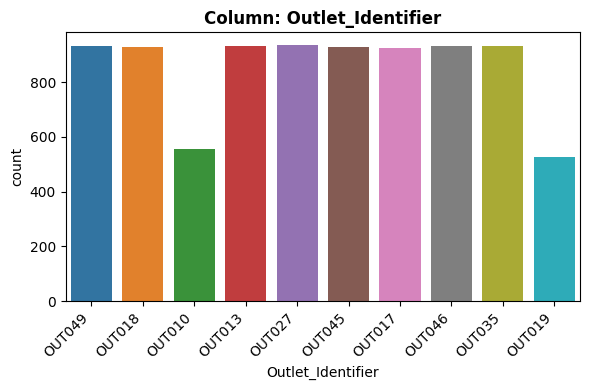

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [65]:
#Call categorical function
explore_categorical(df, feature6);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical(nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - The cardinality is high, with 10 unique values.
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

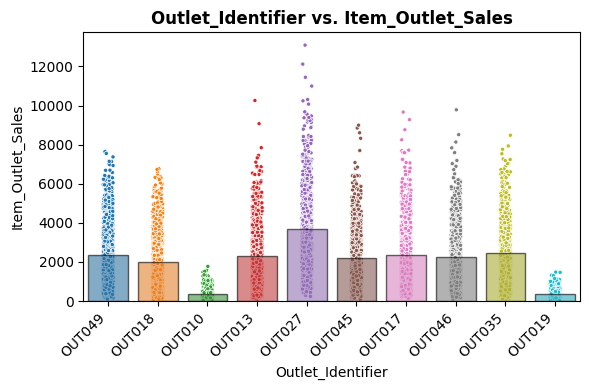

In [66]:
#Multivariate EDA
plot_categorical_vs_target(df, feature6);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - It depends. I'm not sure that the outlet identifier will be as big of a predictor as other feature may be.
2. Does this feature appear to be a predictor of the target?
  - This feature could definitely be a predictor of the target. In the plot, we see that some outlets have much higher sales than others, although the ID of the outlet alone probably does not predict the overall sales as well as other features may.

####Outlet Establishment Year

Outlet_Establishment_Year: The year in which store was established



In [67]:
#Univariate EDA
#Comfirm data type for function call
feature7 = 'Outlet_Establishment_Year'
df[feature7].dtype

dtype('int64')

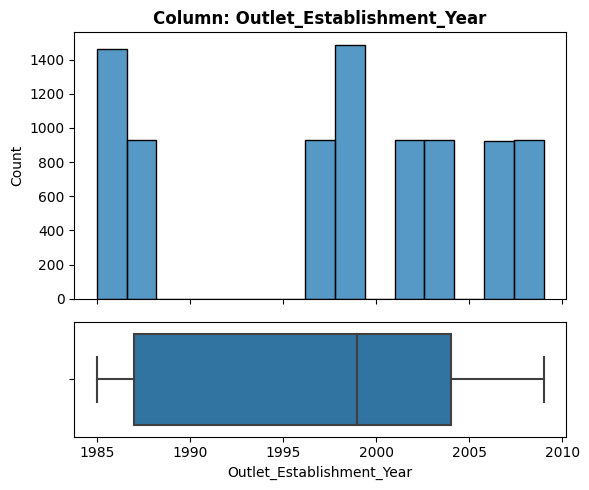

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [68]:
#Call numeric function
explore_numeric(df, feature7);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is numeric.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are 0 null values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - N/A (numeric)
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

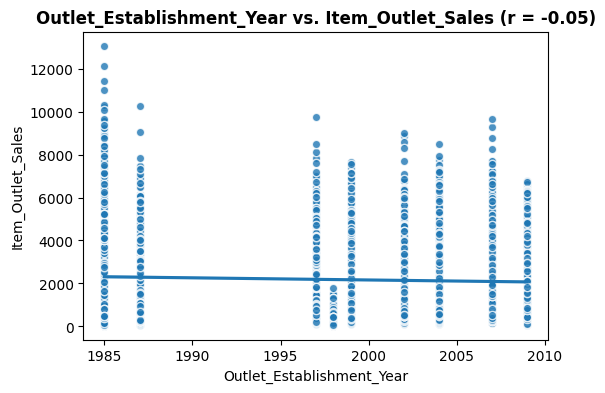

In [69]:
#Multivariate EDA
plot_numeric_vs_target(df, feature7);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I think the establishment year is not going to predict sales.
2. Does this feature appear to be a predictor of the target?
  - This feature shows that there is a slight negative correlation between the year and sales. I do not think this is significant enough to be a true predictor of sales.

####Outlet Size

Outlet_Size: The size of the store in terms of ground area covered



In [70]:
#Univariate EDA
#Comfirm data type for function call
feature8 = 'Outlet_Size'
df[feature8].dtype

dtype('O')

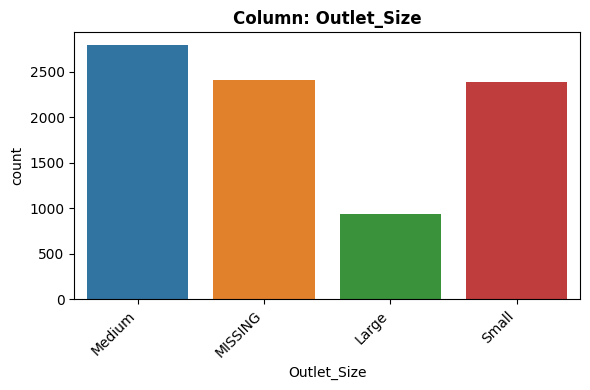

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [71]:
#Call categorical function
explore_categorical(df, feature8);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical, ordinal.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are 2410 missing values, or 28.28%. I would impute these with a placeholder, "Missing".
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - The cardinality is low, with only 4 unique values.
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

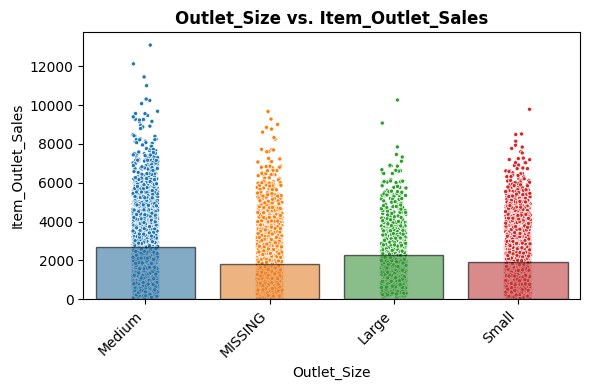

In [72]:
#Multivariate EDA
plot_categorical_vs_target(df, feature8);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I think the outlet size may have an impact on overall sales, as bigger outlets probably carry and sell more items.
2. Does this feature appear to be a predictor of the target?
  - This plot shows that Medium sized outlets actually have the highest sales, opposite of my thinking originally. Outlet size may be a predictor of sales.

####Outlet Location Type

Outlet_Location_Type: The type of area in which the store is located

In [73]:
#Univariate EDA
#Comfirm data type for function call
feature9 = 'Outlet_Location_Type'
df[feature9].dtype

dtype('O')

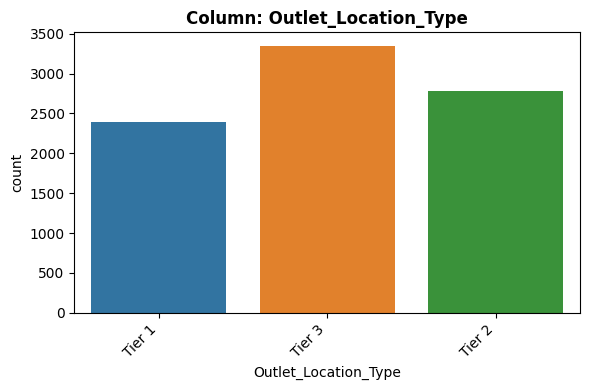

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [74]:
#Call categorical function
explore_categorical(df, feature9);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are 0 missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - The cardinality is low, with only 3 unique values.
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

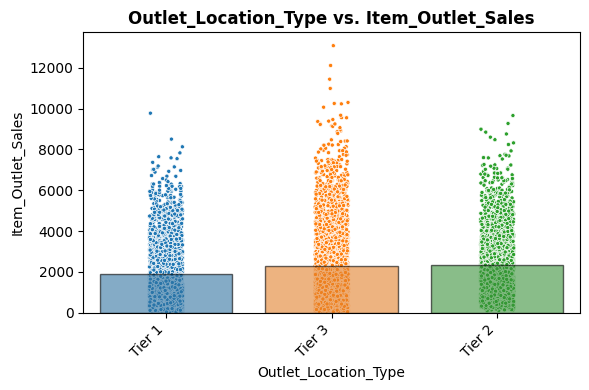

In [75]:
#Multivariate EDA
plot_categorical_vs_target(df, feature9);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - The location type could have an impact on sales.
2. Does this feature appear to be a predictor of the target?
  - This plot shows that outlet location type may be a predictor of sales overall.

####Outlet Type

Outlet_Type: Whether the outlet is a grocery store or some sort of supermarket



In [76]:
#Univariate EDA
#Comfirm data type for function call
feature10 = 'Outlet_Type'
df[feature10].dtype

dtype('O')

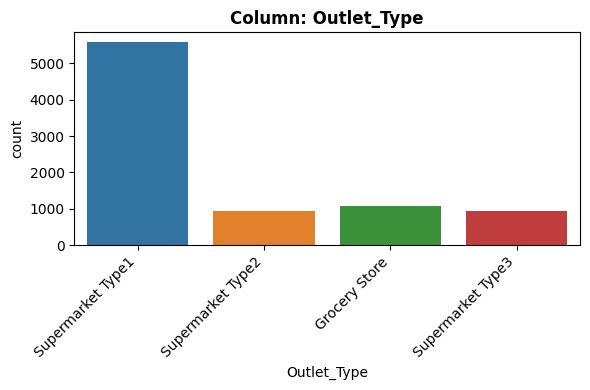

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [77]:
#Call categorical function
explore_categorical(df, feature10);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical, ordinal.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are 0 missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - The cardinality is low, with only 4 unique values.
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

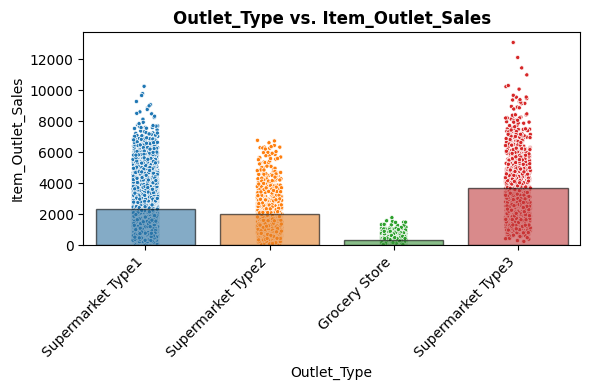

In [78]:
#Multivariate EDA
plot_categorical_vs_target(df, feature10);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that the type of outlet would have an impact on sales.
2. Does this feature appear to be a predictor of the target?
  - This plot shows that outlet type does predict overall sales, as supermarkets of all types out sell regular grocery stores.

####Item Outlet Sales

Item_Outlet_Sales: Sales of the product in the particular store.

**This is the target variable to be predicted.**



In [79]:
#Univariate EDA
#Comfirm data type for function call
feature11 = 'Item_Outlet_Sales'
df[feature11].dtype

dtype('float64')

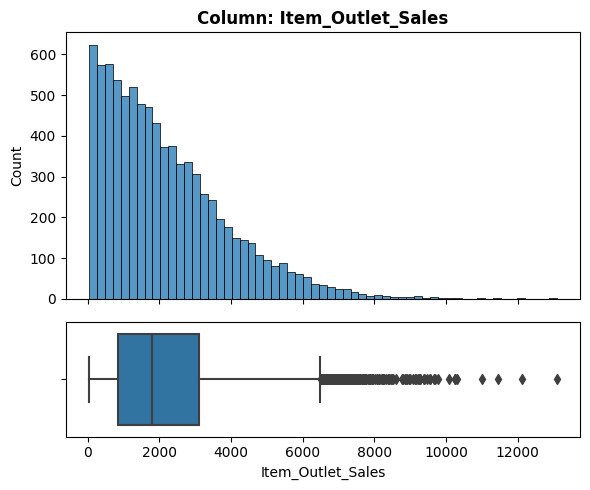

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [80]:
#Call numeric function
explore_numeric(df, feature11);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is numeric.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are 0 null values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - N/A (numeric)
5. Would we know this feature before the target is determined?
  - Yes, this is the target.
6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, this is the target.

No need to do multivariate EDA for the target.

##Machine Learning Pre-Processing

In [81]:
#Machine Learning imports
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

#Set sklearn output to pandas
from sklearn import set_config
set_config(transform_output = 'pandas')

In [82]:
#Load in original data
df2 = pd.read_csv('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/sales_predictions_2023.csv')

In [83]:
#Preview first 5 rows
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- The data loaded correctly.

In [84]:
#Inspect data types
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###Drop Duplicates

In [85]:
#Display duplicates
print(f'There are {df2.duplicated().sum().sum()} duplicates.')

There are 0 duplicates.


- There are no duplicates to drop.

###Fix Inconsistencies

In [86]:
#Change inconsistency in Item_Fat_Content
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
#Verify the change
df2['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [87]:
#Change inconsistency in Outlet_Size
df2['Outlet_Size'] = df2['Outlet_Size'].replace({'High': 'Large'})
#Verify the change
df2['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

###Train/Test Split

###Drop Unwanted Columns

- I will be dropping the Item_Identifier and Outlet_Establishment_Year columns.
- These columns are not useful for the type of prediction we are using, and have such high cardinality that they can be dropped.

In [88]:
#Set X and y
target = 'Item_Outlet_Sales'
y = df2[target]
X = df2.drop(columns = [target, 'Item_Identifier', 'Outlet_Establishment_Year'])

In [89]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [90]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,NaN,Tier 2,Supermarket Type1


###Pre-processing Object

####Missing Values

In [91]:
#Check for missing values
X_train.isna().sum()

Item_Weight             1107
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1812
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

- There are only two columns with missing values: Item_Weight and Outlet_Size.
- The data type will determine the imputation strategy.

In [94]:
#Check data types of columns with null values
display(X_train['Item_Weight'].dtypes, X_train['Outlet_Size'].dtypes)

dtype('float64')

dtype('O')

-Item_Weight is numeric, so I will check the summary statistics to determine the best imputation strategy.
-Outlet_Size is categorical and nominal, so I will determine the imputation strategy based on the values in the column.

In [95]:
#Check summary statistics for Item_Weight
X_train['Item_Weight'].describe()

count    5285.000000
mean       12.904458
std         4.637034
min         4.555000
25%         8.895000
50%        12.650000
75%        17.000000
max        21.350000
Name: Item_Weight, dtype: float64

- I will impute the mean of this feature for the missing values.
- I chose to import the mean because it was fairly close to the median when looking at the summary statistics, which shows that there are not many outliers affecting this value.

In [96]:
#Check value counts of Outlet_Size
X_train['Outlet_Size'].value_counts()

Medium    2103
Small     1788
Large      689
Name: Outlet_Size, dtype: int64

- This is an ordinal column, and I will be imputing missing values with the placeholder 'Missing'.
- I chose this because this is a column with low cardinality, so creating another category will not affect things as much. It could also skew the data if I imputed the most frequent value instead.

####Numeric Pipeline

In [97]:
#Define numeric columns
num_cols = X_train.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [98]:
##Create Pipeline
#Instantiate SimpleImputer
impute_mean = SimpleImputer(strategy = 'mean')

#Instantiate Scaler
scaler = StandardScaler()

#Instantiate pipeline
num_pipe = make_pipeline(impute_mean, scaler)

#View pipeline
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

####Categorical Pipeline

In [99]:
#Define categorical columns
cat_cols = X_train.select_dtypes('object').drop(columns = 'Outlet_Size').columns
cat_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

- There are no missing values in these columns, so the preprocessor will only include OneHot Encoding.

In [100]:
##Create categorical pipeline

#Instantiate OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

#Instantiate pipeline
cat_pipe = make_pipeline(ohe_encoder)

#View pipeline
cat_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

####Ordinal Pipeline

In [101]:
#Define ordinal columns
ord_cols = ['Outlet_Size']
ord_cols

['Outlet_Size']

In [102]:
##Create ordinal pipeline
#Instantiate SimpleImputer
impute_missing = SimpleImputer(strategy = 'constant', fill_value = 'Missing')

#Define list order for Outlet_Size
size_order = ['Small', 'Medium', 'Large', 'Missing']
#Define list order
ordinal_order = [size_order]
#Instantiate Ordinal Encoder
ord_encoder = OrdinalEncoder(categories = ordinal_order)

#Instantiate scaler
ord_scaler = StandardScaler()

#Instantiate pipeline
ord_pipe = make_pipeline(impute_missing, ord_encoder, ord_scaler)

#View pipeline
ord_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='Missing', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'Large',
                                             'Missing']])),
                ('standardscaler', StandardScaler())])

####Column Transformer

In [103]:
#Numeric tuple
num_tuple = ('Numeric', num_pipe, num_cols)

#Categorical tuple
cat_tuple = ('Categorical', cat_pipe, cat_cols)

#Ordinal tuple
ord_tuple = ('Ordinal', ord_pipe, ord_cols)

In [104]:
#Instantiate ColumnTransformer
col_transformer = ColumnTransformer([num_tuple, cat_tuple, ord_tuple], verbose_feature_names_out = False)
#View transformer
col_transformer

ColumnTransformer(transformers=[('Numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('Categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')),
                                ('Ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'Large',
                                                                              'Missing']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size'])],
                  verbose_feature_names_out=False)

In [105]:
#Fit transformer on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('Numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('Categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')),
                                ('Ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'Large',
                                                                              'Missing']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size'])],
                  verbose_feature_names_out=False)

In [106]:
#Transform training data
X_train_processed = col_transformer.transform(X_train)

#Preview first 5 rows
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size
4776,0.817249,-0.712775,1.828109,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.338062
7510,0.556340,-1.291052,0.603369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.338062
5828,-0.131512,1.813319,0.244541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.338062
5327,-1.169219,-1.004931,-0.952591,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.193861
4810,1.528819,-0.965484,-0.336460,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.373536


In [107]:
#Transform testing data
X_test_processed = col_transformer.transform(X_test)

#Preview first 5 rows
X_test_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size
7503,3.310089e-01,-0.776646,-0.998816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.517737
2957,-1.179892e+00,0.100317,-1.585194,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.193861
7031,3.784469e-01,-0.482994,-1.595784,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.338062
1084,4.213344e-16,-0.415440,0.506592,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.338062
856,-6.426567e-01,-1.047426,0.886725,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.193861


In [108]:
#Check data types
X_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      6392 non-null   float64
 1   Item_Visibility                  6392 non-null   float64
 2   Item_MRP                         6392 non-null   float64
 3   Item_Fat_Content_Low Fat         6392 non-null   float64
 4   Item_Fat_Content_Regular         6392 non-null   float64
 5   Item_Type_Baking Goods           6392 non-null   float64
 6   Item_Type_Breads                 6392 non-null   float64
 7   Item_Type_Breakfast              6392 non-null   float64
 8   Item_Type_Canned                 6392 non-null   float64
 9   Item_Type_Dairy                  6392 non-null   float64
 10  Item_Type_Frozen Foods           6392 non-null   float64
 11  Item_Type_Fruits and Vegetables  6392 non-null   float64
 12  Item_Type_Hard Dr

In [109]:
#Summary Statistics
X_train_processed.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size
count,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,...,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00
mean,0.00,-0.00,0.00,0.65,0.35,0.07,0.03,0.01,0.08,0.08,...,0.11,0.11,0.27,0.33,0.40,0.12,0.65,0.11,0.11,-0.00
std,1.00,1.00,1.00,0.48,0.48,0.26,0.16,0.11,0.26,0.27,...,0.31,0.31,0.45,0.47,0.49,0.33,0.48,0.31,0.32,1.00
min,-1.98,-1.29,-1.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.19
25%,-0.81,-0.76,-0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.19
50%,0.00,-0.23,0.03,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.34
75%,0.76,0.56,0.72,1.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,1.37
max,2.00,5.13,1.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.37


##Modeling

###Custom Functions

In [110]:
#Imports from sklearn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [111]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

In [112]:
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

###Linear Regression

In [113]:
#Import linear regression from sklearn
from sklearn.linear_model import LinearRegression

#Instantiate model
lin_reg = LinearRegression()

#Combine preprocessor with model in pipeline
lin_reg_pipe = make_pipeline(col_transformer, lin_reg)


In [114]:
#Fit model pipeline on training data
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Inde...
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'Large',
                                                                                               'Missing']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [115]:
#Evaluate model
evaluate_regression(lin_reg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.141
- MSE = 1,297,569.070
- RMSE = 1,139.109
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.112
- MSE = 1,194,318.729
- RMSE = 1,092.849
- R^2 = 0.567


- To what extent is this model overfit/underfit?

  - This model performs poorly on both the training and testing data, therefore this model is underfit.

###Random Forest

In [116]:
#Import random forest regressor
from sklearn.ensemble import RandomForestRegressor

#Instantiate the model
rf = RandomForestRegressor()

#Combine preprocessor and model into pipeline
rf_pipe = make_pipeline(col_transformer, rf)

In [117]:
#Fit model pipeline onto training data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Inde...
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'Large',
                                                                                               'Missing']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor', RandomForestRegressor())])

In [118]:
#Evaluate random forest model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.171
- MSE = 182,854.309
- RMSE = 427.615
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 770.048
- MSE = 1,226,020.899
- RMSE = 1,107.258
- R^2 = 0.556


- To what extent is this model overfit/underfit?

  - This model is overfit, because the training R2 score is much higher at 0.938 than the testing R2 score of 0.556.

- The linear regression model has better R2 and RMSE scores, while the random forest has a better MAE score. Overall, while neither model performed well on the testing data, the linear regression seems to have performed better than the random forest.

###Random Forest Tuning

In [119]:
#Obtain parameters for tuning options
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

- For tuning, I will use the n_estimators, max_depth, and max_features.

In [120]:
#Define parameter grid with options to try for tuning
params = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[10,50,100,150,200],
          'randomforestregressor__max_features':['sqrt','log2',None]}

In [121]:
#Import GridSearchCV
from sklearn.model_selection import GridSearchCV

#Instantiate GridSearchCV
gridsearch = GridSearchCV(rf_pipe, params, n_jobs= -1, verbose = 1)

#Fit GridSearch on training data
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                                        ('Categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        spars...
                                                                                                                      'Missing']])),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Outlet_Size'])],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__n_estimators': [10, 50, 100,
                                                                 150, 200]},
             verbose=1)

In [122]:
#Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__max_features': None,
 'randomforestregressor__n_estimators': 150}

In [123]:
#Fit best parameters to training data
best_rf = gridsearch.best_estimator_

In [124]:
#Evaluate tuned model
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 642.815
- MSE = 824,805.328
- RMSE = 908.188
- R^2 = 0.721

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 739.586
- MSE = 1,132,683.787
- RMSE = 1,064.276
- R^2 = 0.589


- Overall, the tuned model did perform slightly better than the default model. The R2 score increased from 0.556 to 0.589.


##Evaluation

- Overall, I would recommend the tuned random forest model.
- While all three models did not perform as well as I had hoped, this one had the highest R2 score, as well as having a lower MAE and RMSE scores than the other models. These values will be helpful in explaining the results to stakeholders.

###R-Squared Interpretation

- The R-squared (R2) score explains how well the model fits the data. With an R2 of 58.9% in the model, this tells us that the model does not fit very well overall, but that could be due to many factors that were not addressed in this iteration of modeling.

###Other Metric Interpretation

- In our tuned random forest model, we have a Mean Absolute Error (MAE) score of 739.586. This tells us that on average, the model's predictions were off by about 739 dollars.

- I would use this metric to present to stakeholders because the average of something is usually an easier concept to understand.

###Overfit/Underfit

- Finally, when comparing the training and testing scores of this model, we can see that it performs rather poorly in both cases, meaning this model is underfit.